In [1]:
"""1a"""
import math
import random

def rand_exp(ld):
    u = random.random()
    x = -math.log(u)/ld
    return x

print(rand_exp(.1))

4.834551540301423


Test 1
Expected =  0.2
Obtained =  0.19393673275656384


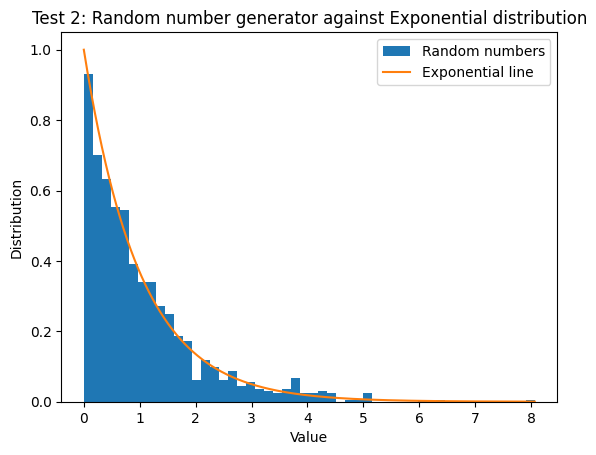

In [30]:
"""1b"""
import numpy as np
import math
import matplotlib.pyplot as plt

def exp_test1(ld, num):
    x = 0
    for i in range(num):
        x += rand_exp(ld)
    expected = 1/ld
    obtained = x/num
    print("Test 1")
    print("Expected = ", expected)
    print("Obtained = ", obtained)

def exp_test2(ld):
    val = [rand_exp(ld) for _ in range(1000)]
    plt.hist(val, bins=50, density=True, label='Random numbers')
    x = np.linspace(0, max(val), 1000)
    y = np.exp(-x)
    plt.plot(x, y, label = "Exponential line")
    plt.legend()
    plt.title("Test 2: Random number generator against Exponential distribution")
    plt.xlabel("Value")
    plt.ylabel("Distribution")

exp_test1(5, 5)
exp_test2(1)

In [9]:
"""1c"""
import math
import random

def rand_poiss(ld, num):
    time = 0
    T = num/ld
    count = 0
    while time < T:
        time += rand_exp(ld)
        if time < T:
            count += 1
    return count

print(rand_poiss(0.2425, 10))

9


In [13]:
"""1d"""
import math
import random

def rand_gamma(k, theta):
    x = 0
    for i in range(k):
        x += rand_exp(theta)
    return x
print(rand_gamma(5, 0.2))

31.459291086234362


1e. This lacks the generality that we typically want because we cannot sum up a fraction of exponentially distributed random numbers. We can only use integers for k, as we cannot generate partial exponentially distributed random numbers, however with a dedicated gamma distributed random number generation, we can use decimals and fractions.

2a. When there are no infected people in the population.

In [14]:
"""2b"""
import random

def sim_SIR(n, i0, beta, gamma):
    sir_t_list = []
    t = 0
    s = n - i0
    i = i0
    r = n - i - s
    max_t = 5000
    for j in range(max_t):
        prob_i = ((beta * s * i)/ n)/100
        prob_r = (gamma * i)/100
        no_change = 1 - (prob_i - prob_r)
        r_no = random.expovariate(1)
        if 0 <= r_no < prob_i:
            if s - 1 != -1:
                s = s - 1
                i = i + 1
        elif prob_i <= r_no < (prob_i + prob_r):
            if i - 1 != -1:
                i = i - 1
                r = r + 1
        elif (prob_i + prob_r) < r_no < 1:
            s = s
            i = i
            r = r
        sir_t_list.append([s,i,r,t])
        t += 1
    return sir_t_list

Text(0.5, 1.0, 'Number of Infected Individuals over Time')

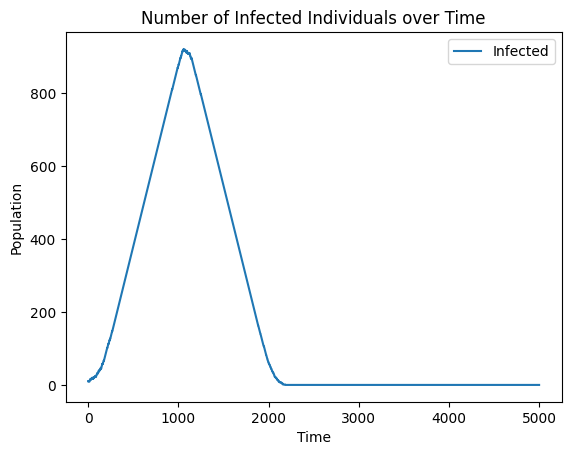

In [15]:
"""2c"""
import matplotlib.pyplot as plt

sir_sim = sim_SIR(1000, 10, 3, 2)
i = []
t = []
for j in range(len(sir_sim)):
    i.append(sir_sim[j][1])
    t.append(sir_sim[j][3])

plt.plot(t, i, label = "Infected")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Number of Infected Individuals over Time")

'This shows that if there are too little people to sustain an infection, and the rate of transmission is too low, the infection will disappear.'

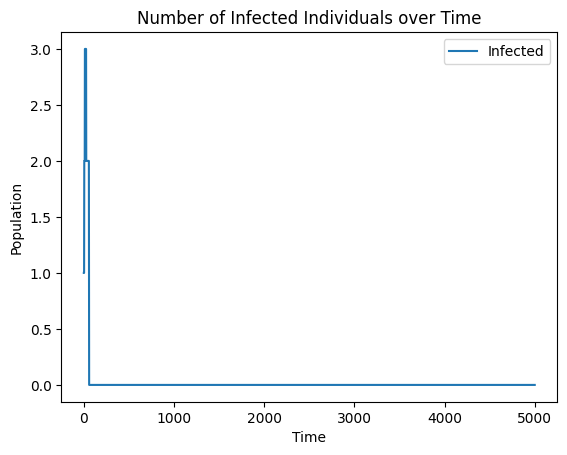

In [18]:
"""2d"""
sim2 = sim_SIR(1000, 1, 3, 2)
i = []
t = []
for j in range(len(sim2)):
    i.append(sim2[j][1])
    t.append(sim2[j][3])

plt.plot(t, i, label = "Infected")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Number of Infected Individuals over Time")

"""This shows that if there are too little people to sustain an infection, and the rate of transmission is too low, the infection will disappear."""

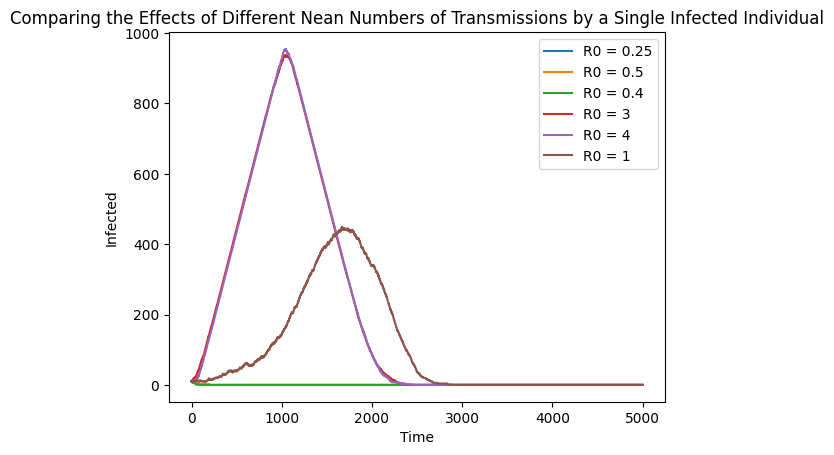

In [27]:
"""2e"""

sim4 = sim_SIR(1000, 10, 0.5, 2)
sim5 = sim_SIR(1000, 10, 1, 2)
sim6 = sim_SIR(1000, 10, 2, 5)
sim7 = sim_SIR(1000, 10, 3, 1)
sim8 = sim_SIR(1000, 10, 4, 1)
sim9 = sim_SIR(1000, 10, 1, 1)

t4 = []
i4 = []
t5 = []
i5 = []
t6 = []
i6 = []
t7 = []
i7 = []
t8 = []
i8 = []
t9 = []
i9 = []

for i in range(len(sim4)):
    t4.append(sim4[i][1])
    i4.append(sim4[i][3])
    t5.append(sim5[i][1])
    i5.append(sim5[i][3])
    t6.append(sim6[i][1])
    i6.append(sim6[i][3])
    t7.append(sim7[i][1])
    i7.append(sim7[i][3])
    t8.append(sim8[i][1])
    i8.append(sim8[i][3])
    t9.append(sim9[i][1])
    i9.append(sim9[i][3])

plt.plot(i4, t4, label = "R0 = 0.25")
plt.plot(i5, t5, label = "R0 = 0.5")
plt.plot(i6, t6, label = "R0 = 0.4")
plt.plot(i7, t7, label = "R0 = 3")
plt.plot(i8, t8, label = "R0 = 4")
plt.plot(i9, t9, label = "R0 = 1")
plt.xlabel("Time")
plt.ylabel("Infected")
plt.title("Comparing the Effects of Different Nean Numbers of Transmissions by a Single Infected Individual")
plt.legend()


Comparing all the R0 situations, I can see that anything below 1 would not cause an outbreak.<br />
0.25, 0.5, 0.4 all do not cause more than tiny spikes in infections at the beginning due to low transmission rates.<br />
R0 = 1 causes a moderate spike in infections, until all infected recover and the infection disappears around 1800 time units. This takes longer to disappear than R0=3 and R0=4 as less people are infected at any one time, which means that less people are resistant when time goes on.<br />
R0 = 3 and R0 = 4 cause a large number of infections within the population, which peak around 1000 time units in, and then steadily die down until the infection completely disappears around 2300 time units. This is in a shorter time than R0=1 because the faster infection rates cause a higher number of infections at the start, and then the number of infected rapidly drops due to most people being resistant more quickly than R0=1. R0=4 Has a higher peak number of infections than R0=3.

2f.
Yes, the process is still Markov. This is because the infection would only depend on the previous state only, i.e. if it was infected before, it would not be now. I would code this by adding a line where it would change all previous infected people into recovered, though store the number of infected so I can calculate the new infected. Then I would calculate the new infected based on the old number of infected, and the rate of infection.

2g. It would be gamma distributed, as an exponential is a special type of gamma where the shape is 1. If the time spent in Ij is exponential with rate gamma, and there are multiple steps of I where time spent is exponential, this means that the time spent from I1 to Im would be gamma distributed, as gamma is the sum of exponentials, as seen in 1d.

2h. There are stages in real life infections that are reflected in the m-sub period model. This may be an infectious period, a harsher symptoms period, a period where the infection cannot spread anymore, and more. In real life, there would not be a fixed period as symptoms can vary wildly in length, and the m-sub period can reflect this. 

The m-sub period can be modeled easily using a gamma distribution, making it easier to simulate compared to the complex systems that do not use gamma distribution. 

2i.<br />
S = Row 1 and Column 1 <br />
I = Row 2 and Column 2
\begin{bmatrix}
1-\beta SI/5 & \beta SI/5\\
\gamma I & 1/ \gamma I
\end{bmatrix}



In [24]:
"""2j"""
import random
import math

def sim_SIS(n, i0, b, g, t):
    s = n - i0
    count = 0
    i = i0
    l = []
    while count < t:
        prob_inf = ((b * s * i)/n)/100
        prob_sus = (g*i)/100
        no_change = 1 - (prob_inf + prob_sus)
        r_no = random.expovariate(1)
        if 0 < r_no < prob_inf:
            if s - 1 != -1:
                s = s - 1
                i = i + 1
                count = count + 1
                l.append([s, i, count])
                continue
        elif prob_inf < r_no < (prob_inf + prob_sus):
            if i - 1 != -1:
                i = i - 1
                s = s + 1
                count = count + 1
                l.append([s, i, count])
                continue
        else:
            l.append([s, i, count])
            continue
    return l

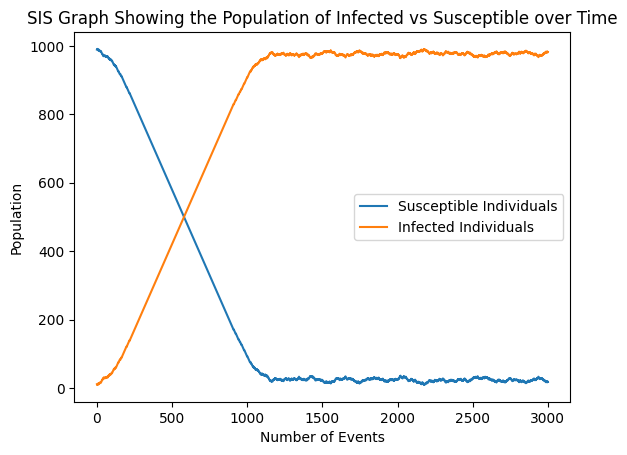

In [25]:
"""2k"""
import matplotlib.pyplot as plt

s = []
i = []
t = []
sim = sim_SIS(1000, 10, 3, 2, 3000)
for j in range(len(sim)):
    t.append(sim[j][2])
    i.append(sim[j][1])
    s.append(sim[j][0])

plt.plot(t, s, label = "Susceptible Individuals")
plt.plot(t, i, label = "Infected Individuals")
plt.xlabel("Number of Events")
plt.ylabel("Population")
plt.title("SIS Graph Showing the Population of Infected vs Susceptible over Time")
plt.legend()


The graph first starts off with a low amount of infected and a high number of susceptible individuals. The number of infected then ramps up while the number of susceptible individuals goes down. It stabilises at around 1000 "events", where the number of infected is high and the number of susceptible individuals is low. There are some spikes where the number of susceptible individuals increase, and then it goes back down in a cycle, until it stabilises over time. Because there is no immunity or resistance from the disease, the number of infected will always remain high, and will likely always infect the susceptible individuals after they recover.